
# 🧠 Early Stopping in Neural Networks

This notebook explores **Early Stopping** as a regularization strategy to avoid overfitting and optimize model training.

---



## 💡 What is Early Stopping?

**Early Stopping** is a form of regularization used to avoid overfitting in neural networks. It monitors the model’s performance on a **validation set** during training and **stops training** when the performance **stops improving**.

---



## 🔁 How Does Early Stopping Work?

1. The training process is monitored using a specific metric (usually **validation loss** or **validation accuracy**).
2. If the metric doesn’t improve for a defined number of epochs (called **patience**), training is stopped.
3. Optionally, the best weights are restored using `restore_best_weights=True`.

---



## 🌟 Why is Early Stopping Important?

- Prevents **overfitting** by stopping before the model memorizes the training data.
- Saves **training time and compute**.
- Helps retain the model with the **best validation performance**, not just the last one.

---



## 🧪 Implementing Early Stopping in Keras

Let's see how to implement Early Stopping in different ways using the **MNIST** dataset.

---


In [11]:

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import random




In [12]:
# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


### 🔧 Define a Simple MLP Model


In [13]:

def create_model():
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



### ✅ Method 1: EarlyStopping Based on Validation Loss


In [14]:

model1 = create_model()
es1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history1 = model1.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=128,
    callbacks=[es1],
    verbose=2
)


Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t


### ✅ Method 2: EarlyStopping Based on Validation Accuracy


In [15]:

model2 = create_model()
es2 = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)
history2 = model2.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=128,
    callbacks=[es2],
    verbose=2
)


Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t


## 📊 Comparing Early Stopping Effects


d:\Program_Files\anaconda3\envs\tf_2.2\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
d:\Program_Files\anaconda3\envs\tf_2.2\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


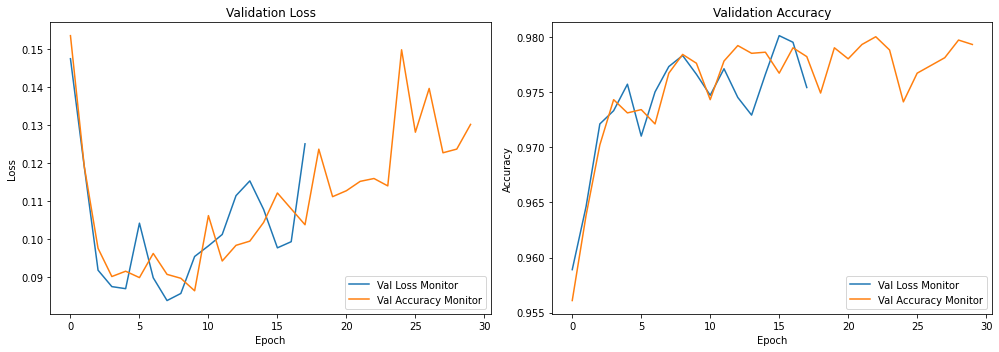

In [16]:

def plot_history(histories, titles):
    plt.figure(figsize=(14, 5))
    for i, history in enumerate(histories):
        plt.subplot(1, 2, 1)
        plt.plot(history.history['val_loss'], label=f'{titles[i]}')
        plt.title('Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['val_accuracy'], label=f'{titles[i]}')
        plt.title('Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history([history1, history2], ['Val Loss Monitor', 'Val Accuracy Monitor'])


In [17]:
# Evaluate
loss, acc = model1.evaluate(x_test, y_test, verbose=1)
# print(y_test[0:10])
# Show results
print(f"Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Predict on test set
y_pred = model1.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0:10])


print("Accuracy Report:\n", classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9758
Accuracy: 0.9758, Loss: 0.0820
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 5 9]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
 

In [18]:
# Evaluate
loss, acc = model2.evaluate(x_test, y_test, verbose=1)
# print(y_test[0:10])
# Show results
print(f"Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Predict on test set
y_pred = model2.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0:10])


print("Accuracy Report:\n", classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step - loss: 0.1119 - accuracy: 0.9806
Accuracy: 0.9806, Loss: 0.1119
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 5 9]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
 


## ✅ Conclusion

- Early Stopping is an effective technique to control overfitting.
- You can monitor different metrics such as `'val_loss'` or `'val_accuracy'`.
- Using `restore_best_weights=True` helps you retain the most performant model.

---
